In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_df = pd.read_csv('/aiffel/data/train.csv')
test_df = pd.read_csv('/aiffel/data/test.csv')
combine = [train_df, test_df]

In [3]:
train_df0 = train_df.copy()

In [4]:
type(train_df)
type(test_df)

pandas.core.frame.DataFrame

In [5]:
print(test_df.shape)
print(train_df.shape)

(418, 11)
(891, 12)


In [6]:
print(train_df.columns.values)
print(test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [10]:
train_df.info()
train_df_temp = train_df.copy()
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4

mode()[0] 
결측치를 채울때 가장빈도가 높은 첫번쨰 즉0번째로 채우겠다는뜻


In [11]:
train_df['Age'] = train_df['Age'].fillna(0)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
print('The most frequent value:',train_df['Embarked'].mode()[0])
train_df.info()

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [12]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,0.0,1,2,S
889,1,1,male,26.0,0,0,C
890,0,3,male,32.0,0,0,Q


female(0)
male(1)
embarked=2(s)/0(c)/1(q)
을
cat.codes로 치완

In [13]:
train_df["Sex"] = train_df["Sex"].astype('category')
train_df["Sex"] = train_df["Sex"].cat.codes

train_df["Embarked"] = train_df["Embarked"].astype('category')
train_df["Embarked"] = train_df["Embarked"].cat.codes

train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
888,0,3,0,0.0,1,2,2
889,1,1,1,26.0,0,0,0
890,0,3,1,32.0,0,0,1


In [14]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,1.536476
std,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


In [15]:
for i in range(1,train_df.shape[1]):
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009


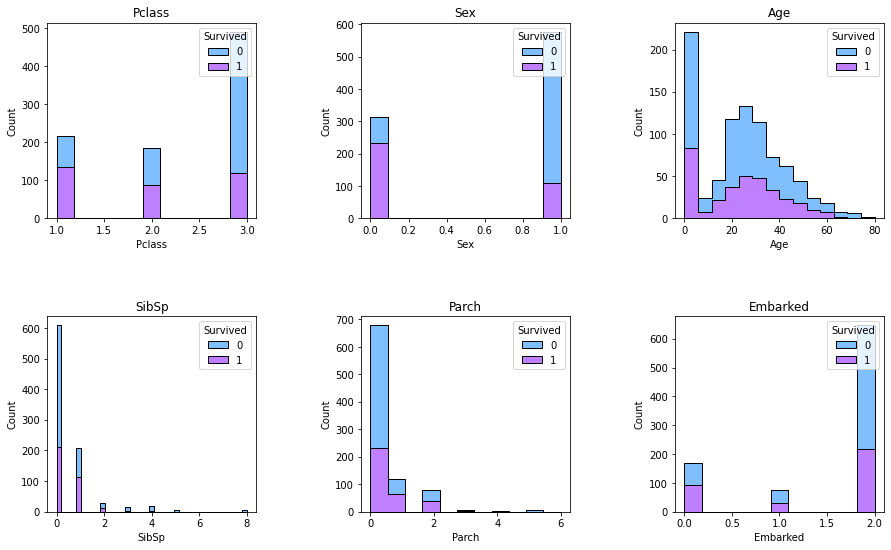

In [16]:
col_name = train_df.columns[1:]

fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

for i in range(col_name.shape[0]):
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',palette='cool',
                 multiple="stack",ax=axs[i], element="step")
    axs[i].set_title(col_name[i])

In [17]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
888,0,3,0,0.0,1,2,2
889,1,1,1,26.0,0,0,0


In [36]:
train_df.iloc[1:,:4]

,Survived,Pclass,Sex,Age
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0
5,0,3,1,0.0
...,...,...,...,...
886,0,2,1,27.0
887,1,1,0,19.0
888,0,3,0,0.0
889,1,1,1,26.0


iloc 할떄 [행,열]==>[시작지점,도착지점]
0번째는 공백이라생각하고 1번부터 해야한다 즉 0번은 공백이고 1번이 age로 
시작할떄 헷갈릴수있으니 데이터 프레임head를 사용해서 iloc 으로 확인을해야 
구분이 가능할것같다

+rand 털찐 고양이로 만들어준다
rand 가 시각화를 위해 
1~1000 숫자가 작을수록 이 그래프 의 표시가 넓게 퍼진다
원래는 1자로 중복되어 찍혀있는 점을 ㅡ 로 넓게 퍼지게 만들었다
-의미가없다 살을찌우기 위한것이기때문에 

In [19]:
print(rand)

NameError: name 'rand' is not defined

<Figure size 648x648 with 0 Axes>

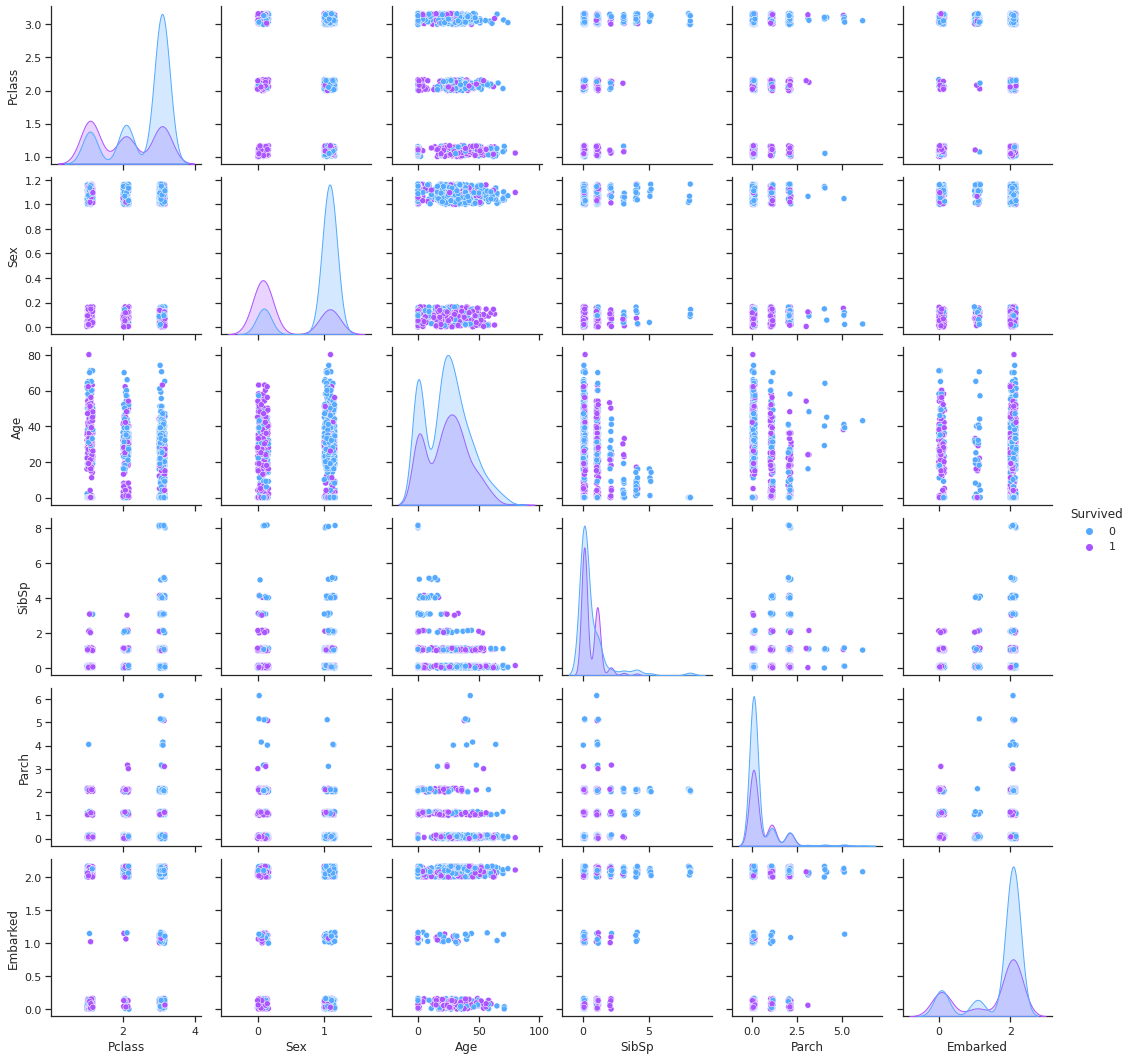

In [20]:
train_df_rand = train_df.copy()

plt.figure(figsize=(9,9))
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), 
                  columns=train_df.iloc[:,1:].columns)/600
train_df_rand.iloc[:,1:]=train_df.iloc[:,1:]+rand
sns.set(style="ticks")
sns.pairplot(train_df_rand,hue='Survived',palette='cool')

0일수록 상관없다 1이면 완전증가한다 -1이면 감소한다
수경좌 예시
날씨/나이/근력/신발사이즈
나이+신발=1
나이를 먹을수록 신발의사이즈는 커진다+1(+ + +)
나이+근력=-1
나이를 먹을수록 근육의량은 줄어든다-1(+ + -)
스트레스 + 머리
스트레스가 높아질수록 머리가 빠진다 +1
스트레스가 높은데 머리가 안빠진다 0
스트레스가 없는데 머리가 빠진다 -1

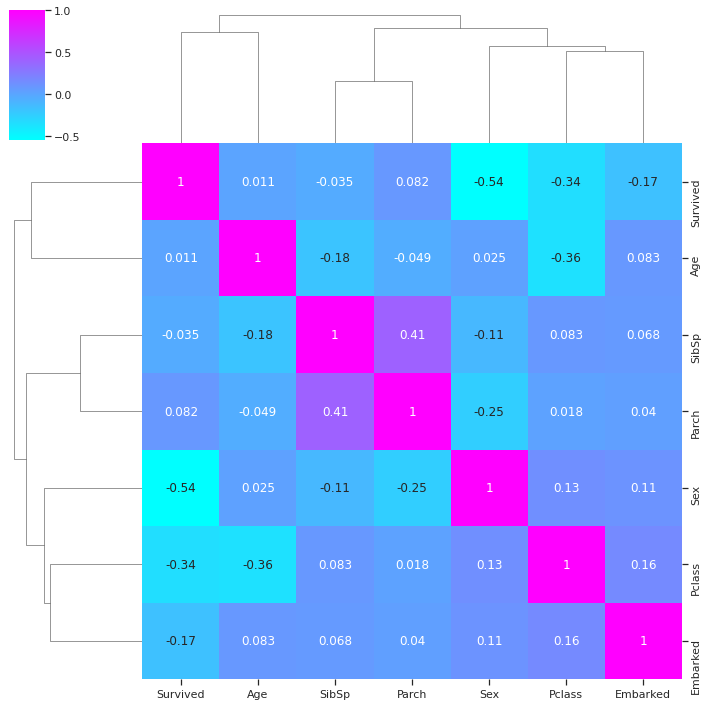

In [21]:
corr = train_df.corr()
sns.clustermap(corr,annot = True,cmap = 'cool')

y트레인은 타겟값
x는 서바이브드 뺀 나머지값

In [22]:
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
print(X_train.shape,y_train.shape)

(891, 6) (891,)


x_test 는 기준점을 맞추기위해 똑같이 만들었다

In [23]:
test_df = test_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
test_df['Age'] = test_df['Age'].fillna(0)
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
print('The most frequent value:',test_df['Embarked'].mode()[0])
test_df["Sex"] = test_df["Sex"].astype('category')
test_df["Sex"] = test_df["Sex"].cat.codes

test_df["Embarked"] = test_df["Embarked"].astype('category')
test_df["Embarked"] = test_df["Embarked"].cat.codes

test_df.info()
X_test = test_df.copy()
print(X_test.shape)

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int8   
dtypes: float64(1), int64(3), int8(2)
memory usage: 14.0 KB
(418, 6)


In [24]:
from sklearn.model_selection import KFold#교차감증
from sklearn.metrics import accuracy_score#정확도계산
from sklearn.metrics import f1_score#리콜 프리시젼을 조화롭게 신경써준다
from sklearn.svm import SVC#서포트 벡터머신
from sklearn.neighbors import KNeighborsClassifier#네이버 분류모델
from sklearn.tree import DecisionTreeClassifier#의사결정나무
from sklearn.linear_model import  LogisticRegression, SGDClassifier#로지스틱회귀 LG회귀 너때매 날린파일만 수십억이야 알아?
from sklearn.ensemble import RandomForestClassifier#랜덤포레스트

import matplotlib.ticker as ticker#눈금(major,minor(주,부))설정
from sklearn.metrics import roc_curve#roc 커브
from sklearn.metrics import roc_auc_score#auc 스코어 area under curve

곡선이 있으면 그 곡선기준 아래로는 전부다 auc
auc가 넓으면 모델성능이 좋다

In [31]:
def kfold(X_train,y_train,clf):#함수정의 kfold 우리가 정한 함수이름(지역변수)
    clf_score = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
    global X_tra, X_val, y_tra, y_val, y_pred
    for tra_index, val_index in kf.split(X_train):
        X_tra, X_val = X_train.iloc[tra_index,:], X_train.iloc[val_index,:]
        y_tra, y_val = y_train.iloc[tra_index], y_train.iloc[val_index]
        
        clf.fit(X_tra, y_tra) 
        
        y_pred = clf.predict(X_val) 
        clf_score.append(clf.score(X_tra,y_tra))
    print("Score:", np.mean(clf_score))

5개가 있으면 그중 4개를 학습시킨후 학습시키지않은 데이터를 검증시킨다 교차검증 kfold 가장 유명
다섯번 학습 및 검증시킨후 평균을 구한다

for i in range[1,5]


In [29]:
models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors = 3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(X_train,y_train,clf) 


y_predict = clf.predict(X_test)

model: SVC(gamma='auto')
Score: 0.8754203633956852
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.8678455489544101
model: SGDClassifier(max_iter=100)
Score: 0.7219116882298249
model: SGDClassifier()


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have v

Score: 0.7281017066675071
model: LogisticRegression()
Score: 0.7946152512725153
model: DecisionTreeClassifier(max_depth=10)
Score: 0.9203141497391936
model: RandomForestClassifier()
Score: 0.9424815229210332


AUC: 0.7628837719298246


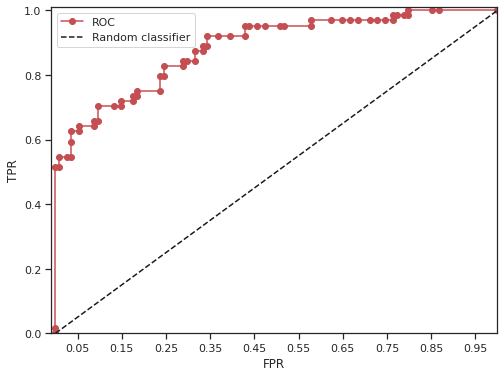

In [32]:
clf = LogisticRegression(solver='lbfgs')#하이퍼파라미터
clf.fit(X_tra,y_tra)
pred_proba_class1 = clf.predict_proba(X_val)[:,1]

plt.figure(figsize=(8,6))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class1)#폴아웃 false positive,true positive rate(리콜))
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(y_pred, y_val)    

print("AUC:",roc_auc_score(y_pred,y_val))

1과 가까울수록 좋다 auc 는 최밋값이 1)
roc 그래프는 왼쪽으로 치우치며 위로갈수록 좋은것이다

# 회고 적기
솔직히 어려웠던 부분을 수경님이 알려주셨고 예를 설명해주셔서 정말 감사합니다 

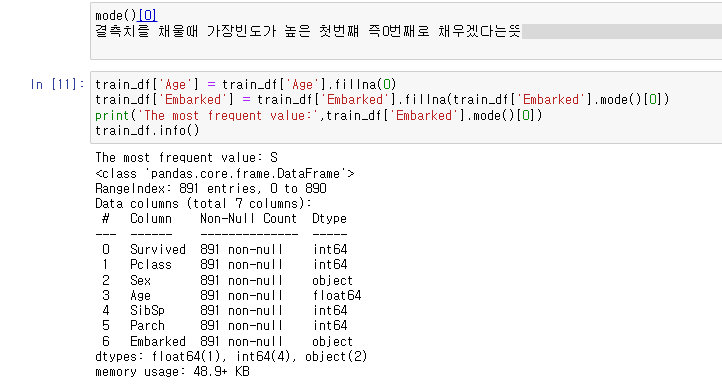

이부분중 mode()[0]이부분에 이해가 어려웠는데 수경님이 해석도와주셨으요 
아직 이해가 완전한건 아니지만 최빈값을 이용해 가장 빈도가 높은 0번째 를 이용하여 결측치를 채우겠다고 모드가 정의하고있다고 생각합니다
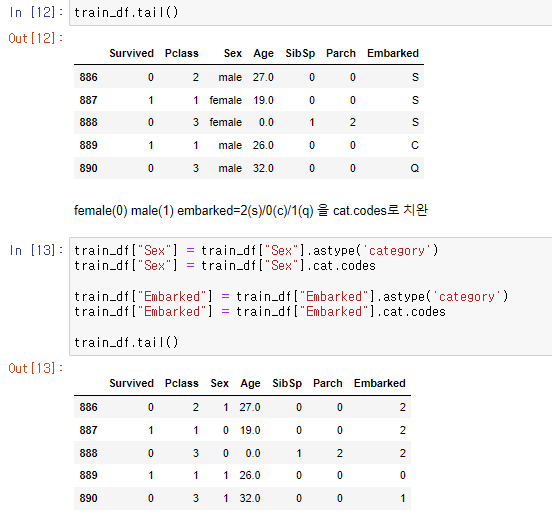
이부분 또한 cat.codes가 뭐였지 하며 해석하는동안 배운것이며 cat.codes 를 사용하여 성별과 탑승장소를 0 과 1 의 숫자로 치환 하였으며 처음엔 astpye 또한 뭐였는지 어려웠으나 열의 메서드를 바꾸는 함수였으며
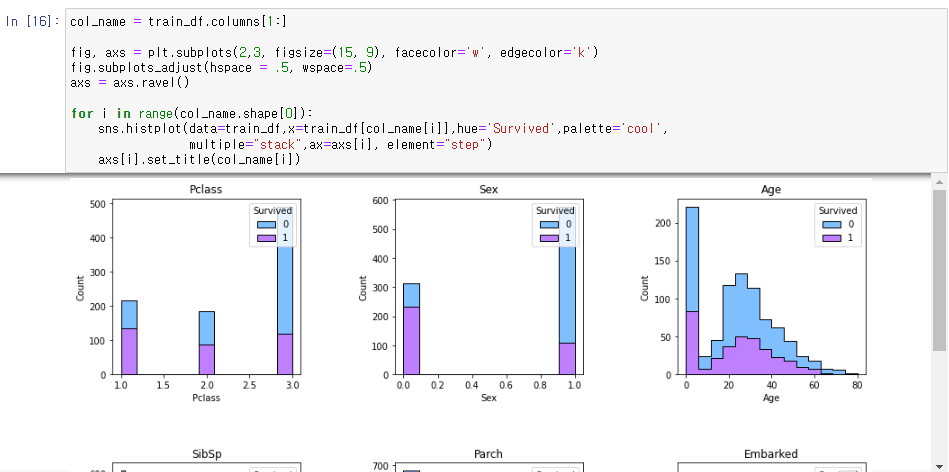이부분또한
자칫 귀찮아하실수도 있는 부분을 자세히 알려주셨다 정말 고마운 분이시다....감사합니다
다시 본론으로 돌아오자면 
처음에 봤을땐 어? hue 는 뭐고 palette이 뭐였지 하고있었는데 hue 는 
생존자를 표시하는 시각화  사용법이였고 palette는 팔렛물감처럼 색깔을 정하는 함수(?)(몰?루)였다
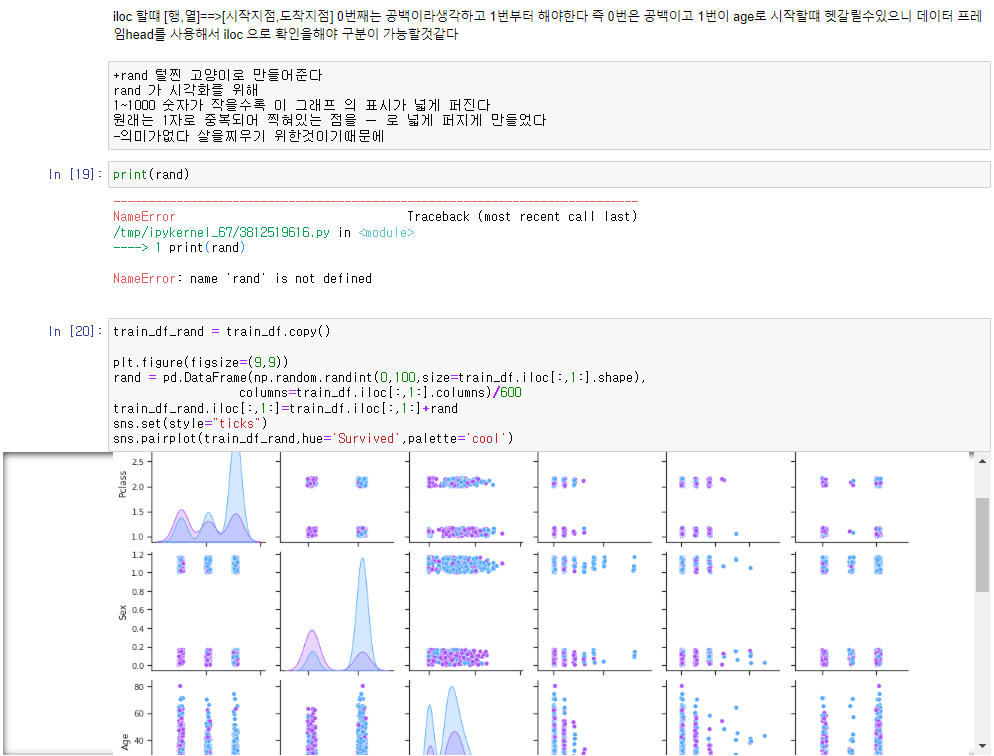
iloc 에 대해서도 기억못하고있었는데 퍼실님과 조원한분의 도움으로 다시 배웠으며 기초정의도 어느정도 기억하고있다(이젠..maybe)
[1:,:4] 이것은 행 1번 부터 시작이며 제한이 없고 열 4번 까지라고 이해하고있다 즉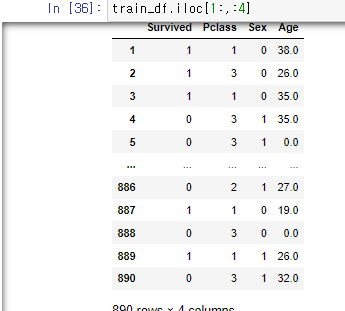
약간의 이해도는 가지고있다고 생각하고있다
털찐 고양이는 rand 라는 함수를 이해하기위해 만든 예시이며
숫자가 작을수록 그래프는 넓게 퍼지지만 잘못만든다면 나의 의도와는 다르게 흘러갈수있다
하지만 높을수록 그점주위 의 집중도가 높아지며 깔끔하게 볼수있다 rand 만든사람은 천재가 분명하다고 칭찬이 자자하단다..(쩔어)
하지만 모든것은 시각화에서 임팩트를 주기위한것이기때문에 큰 의미가 없다고 한다
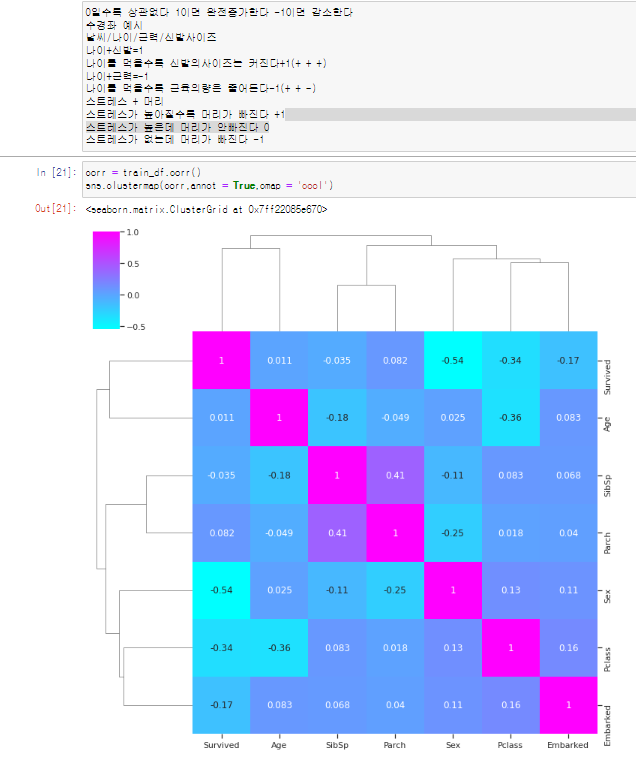
이부분도 도움을 받았으며 약간 이해하고 있는 정도라고 생각한다
상관 계수에서 0에 가까울수록 관련이 없으며 1에 가까울수록 완전히증가하며
-1에 가까울수록 완전 반대방향으로 간다고 한다
======================================================================================================
적을수록 느끼는거지만 공부를 더해야한다고 느끼고 오늘만해도 그렇다 알고있던걸 잊어먹고있었던것과
모르는걸 배우는건 다른기분이 들기때문이다 모르는걸배우면 재미를 느끼지만 
알고있던걸 다시배우면 그걸 잊고있었네 공부좀 더할걸이란 생각이 들었기 때문이다.

알려주신 조원분과 퍼실님에겐 정말 감사인사를 전하고싶고 조금더 내가 원하는 방향으로 발전할수 있었으면 좋겠다

현재 이글을 적으면서도 데이터 프레임에 사용하는 단어가 기억이 나질않으며 찾아봐야하는수준이다 
이게 초반이라 맞다고들 하지만 찾아보는건 나의 재미를 줄이겠다고 생각해서 별로 달갑게 생각하진않는다
건방지다고 생각할수도 있겠지만 내 생각이 그러한건 어쩔수없다 남이 저사람을 좋아한다고해서 욕할건 아니니까...
자의식 과잉이라고 생각도 하지만 아닐수도 있다고 생각한다 경험상 이런거 하나하나 안지켰다가 싸운적이 몇번있다
인생사살기 진짜 더럽게 치사하고 짜증난다 하지만 재미도 있으니까 살만한것 같다 이런걸 왜적냐면 심심해서이다
이해좀 해줭







feat. 난 사람많은곳은 안어울리는것 같다 서로 말하다보니 말이 끊기는경험은 언제나 싸움이 일어날것같아 무섭다
